In [4]:
## 📝 程式碼區塊 1: 導入函式庫和環境設定

# 導入所需的 Python 函式庫
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 導入 Google Colab 專用的函式，用於檔案操作和圖片顯示
from google.colab import files


# 設置 matplotlib 輸出為 Jupyter/Colab 內聯顯示 (符合程式碼審查的環境設定)
%matplotlib inline

print("所需函式庫已成功導入。")

所需函式庫已成功導入。


In [2]:
## ⚙️ 程式碼區塊 2: 核心函式定義 (模組化設計)

def load_image_from_colab():
    """
    【功能】從 Colab 環境上傳並讀取圖片檔案。
    【流程】提示使用者上傳檔案 -> 使用 OpenCV 讀取。

    Returns:
        numpy.ndarray: 讀取的 BGR 格式圖片陣列；若失敗則回傳 None。
    """
    try:
        # 使用 Colab 函式讓使用者選擇並上傳檔案
        uploaded = files.upload()
        if not uploaded:
            print("未上傳任何檔案，終止讀取。")
            return None

        # 取得上傳的第一個檔案名稱
        uploaded_filename = list(uploaded.keys())[0]

        # 使用 OpenCV 讀取圖片，預設為 BGR 格式
        img_bgr = cv.imread(uploaded_filename)

        if img_bgr is None:
            # 處理檔案存在但 OpenCV 無法解析的錯誤
            raise FileNotFoundError(f"OpenCV 無法讀取檔案：{uploaded_filename} (可能是檔案損壞或格式不支援)")

        print(f"✅ 成功讀取圖片：{uploaded_filename} (尺寸: {img_bgr.shape})")
        return img_bgr

    except Exception as e:
        # 錯誤處理 (Error Handling)
        print(f"❌ 圖片讀取發生錯誤: {e}")
        return None

def apply_gaussian_blur(image, kernel_size=(9, 9)):
    """
    【功能】對圖片應用高斯模糊濾鏡，用於平滑影像並降低雜訊。

    Args:
        image (numpy.ndarray): 輸入圖片 (BGR 格式)。
        kernel_size (tuple): 高斯核的大小 (必須是奇數，例如 (9, 9))。

    Returns:
        numpy.ndarray: 處理後的圖片。
    """
    # 高斯模糊的 Kernel size 必須是奇數
    return cv.GaussianBlur(image, kernel_size, 0)

def detect_edges_canny(image, low_threshold=50, high_threshold=150):
    """
    【功能】使用 Canny 演算法偵測圖片邊緣。
    【步驟】先轉換為灰階 -> 應用 Canny 演算法。

    Args:
        image (numpy.ndarray): 輸入圖片 (BGR 格式)。
        low_threshold (int): 邊緣追蹤的低閾值。
        high_threshold (int): 邊緣追蹤的高閾值。

    Returns:
        numpy.ndarray: 邊緣偵測結果 (灰階圖片)。
    """
    # 1. 轉換為灰階 (Canny 演算法要求灰階輸入)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # 2. 應用 Canny 邊緣偵測
    edges = cv.Canny(gray, low_threshold, high_threshold)

    return edges

def show_image_in_colab(image, title="處理結果", is_gray=False):
    """
    【功能】在 Colab 中使用 Matplotlib 顯示圖片 (確保色彩正確)。
    """
    plt.figure(figsize=(12, 6))
    plt.title(title, fontsize=14)

    if is_gray:
        # 灰階圖直接以灰度顏色映射顯示
        plt.imshow(image, cmap='gray')
    else:
        # OpenCV 圖片為 BGR 格式，Matplotlib 顯示需要轉換為 RGB
        img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)

    plt.axis('off') # 隱藏座標軸
    plt.show()

def save_processed_image(image, output_filename="processed_result.png"):
    """
    【功能】將處理後的圖片儲存並提供下載連結。
    """
    # 使用 Python 的 with 語句確保檔案資源被正確管理 (符合程式碼審查的資源管理要求)
    try:
        cv.imwrite(output_filename, image)
        print(f"✅ 圖片已儲存為 {output_filename}")

        # 觸發下載 (Colab 特有功能)
        files.download(output_filename)
    except Exception as e:
        print(f"❌ 圖片儲存或下載發生錯誤: {e}")

## 🚀 執行多媒體應用專題：高階圖片濾鏡生成器
請依照提示上傳一張圖片 (.jpg 或 .png)


Saving taipei101.jpg to taipei101.jpg
✅ 成功讀取圖片：taipei101.jpg (尺寸: (4000, 2252, 3))

--- 影像處理中 ---
Step 1/2: 已套用高斯模糊 (9x9 Kernel)。
Step 2/2: 已套用 Canny 邊緣偵測。

--- 成果展示 (Matplotlib 輸出) ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


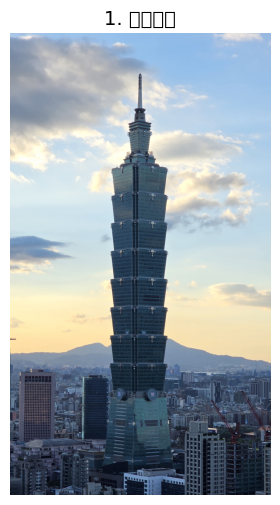

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31946 (\N{CJK UNIFIED IDEOGRAPH-7CCA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34389 (\N{CJK UNIFIED IDEOGRAPH-8655}) missing from font(s) DejaVu Sans.
  fig.canvas

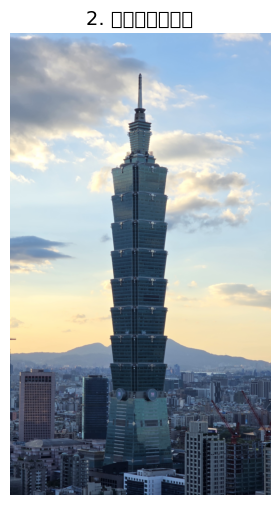

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32227 (\N{CJK UNIFIED IDEOGRAPH-7DE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20597 (\N{CJK UNIFIED IDEOGRAPH-5075}) missing from font(s) DejaVu Sans.
  fig.canvas

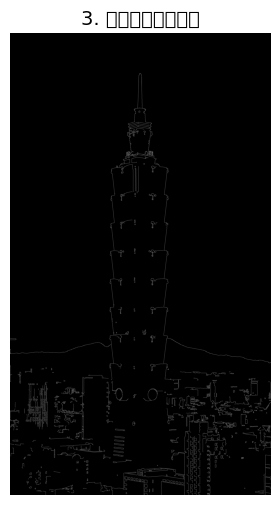

✅ 圖片已儲存為 Final_Edges_Result.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ 最終結果已儲存，請檢查瀏覽器中的下載通知。


In [3]:
## 🚀 程式碼區塊 3: 主程式執行 (Main Execution Block)

def main():
    """
    專題主程式，依序執行圖片讀取、濾鏡處理和結果顯示。
    """
    print("=====================================================")
    print("## 🚀 執行多媒體應用專題：高階圖片濾鏡生成器")
    print("請依照提示上傳一張圖片 (.jpg 或 .png)")
    print("=====================================================")

    # 1. 讀取圖片 (會觸發上傳視窗)
    original_img = load_image_from_colab()

    if original_img is None:
        print("\n🚫 由於無法讀取圖片，程式終止執行。")
        return

    # --- 濾鏡處理流程 ---
    print("\n--- 影像處理中 ---")

    # 2. 應用第一個濾鏡：高斯模糊 (平滑化)
    # kernel size 設為 (9, 9)
    blurred_img = apply_gaussian_blur(original_img, kernel_size=(9, 9))
    print("Step 1/2: 已套用高斯模糊 (9x9 Kernel)。")

    # 3. 應用第二個濾鏡：Canny 邊緣偵測
    # 偵測邊緣主要基於亮度變化，因此適用於模糊後的圖片
    edges_img = detect_edges_canny(blurred_img, low_threshold=50, high_threshold=150)
    print("Step 2/2: 已套用 Canny 邊緣偵測。")

    # 4. 顯示結果
    print("\n--- 成果展示 (Matplotlib 輸出) ---")
    show_image_in_colab(original_img, title="1. 原始圖片")
    show_image_in_colab(blurred_img, title="2. 高斯模糊處理後")
    show_image_in_colab(edges_img, title="3. 最終邊緣偵測結果", is_gray=True)

    # 5. 儲存最終結果
    output_filename = "Final_Edges_Result.png"
    save_processed_image(edges_img, output_filename)
    print("\n✅ 最終結果已儲存，請檢查瀏覽器中的下載通知。")

# 確保程式只有在直接執行時才運行 main() (符合標準 Python 執行慣例)
if __name__ == "__main__":
    main()